#Trabajo practico 3 Parte 1
Pinto, Nicolas \


##Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

##Datasets

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id= '1vAH4o97zYZ2RT8Mbgz3Be4AN2xxbA_4W'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_transaction.csv')
train_transaction = pd.read_csv('train_transaction.csv')

In [ ]:
id= '1YGDFxRvxm1wMVaL3E5GpgP2KQqun8OFj'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_identity.csv')
train_identity = pd.read_csv('train_identity.csv')

In [ ]:
joineado = pd.merge(left=train_transaction, right=train_identity, left_on='TransactionID', right_on='TransactionID', how = 'left')


##Barplot

In [ ]:
tarjetas_fraude = train_transaction.groupby(['card4']).agg({'isFraud':'sum'})
tarjetas = train_transaction.groupby(['card4']).agg({'isFraud':'count'})

In [ ]:
porcentaje_tarjetas_fraude = pd.DataFrame((tarjetas_fraude['isFraud']/tarjetas['isFraud'])*100)
porcentaje_tarjetas_fraude.reset_index(inplace = True)
porcentaje_tarjetas_fraude.rename(columns={'card4': 'tarjetas', 'isFraud': 'porcentaje_fraudes'},inplace = True)
porcentaje_tarjetas_fraude

,tarjetas,porcentaje_fraudes
0,american express,2.869837
1,discover,7.728161
2,mastercard,3.433095
3,visa,3.475610


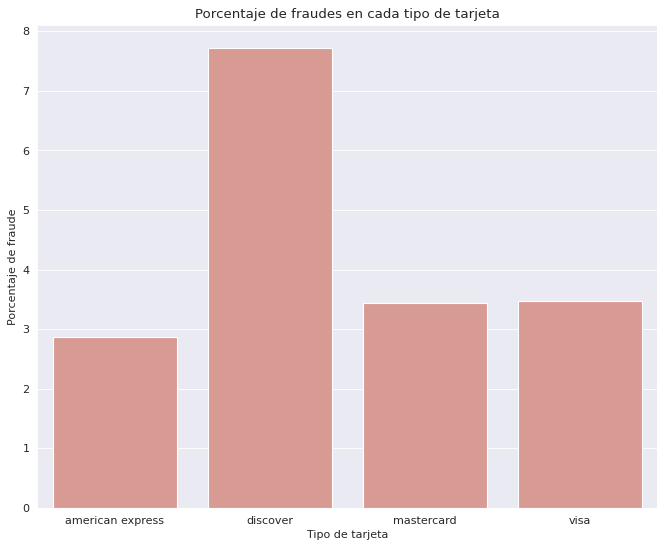

In [ ]:
plt.figure(dpi = 80)
barplot = sns.barplot(x=porcentaje_tarjetas_fraude['tarjetas'], y = porcentaje_tarjetas_fraude['porcentaje_fraudes'], data = porcentaje_tarjetas_fraude, color= 'salmon', saturation = .5)
barplot.set(xlabel='Tipo de tarjeta', ylabel='Porcentaje de fraude', title = 'Porcentaje de fraudes en cada tipo de tarjeta')
plt.show()

##HeatMap

In [ ]:
fraude = train_transaction.loc[train_transaction['isFraud']== 1, :]

In [ ]:
fraudes_productos_tarjetas = pd.pivot_table(data = fraude, index = 'card4', values = 'isFraud', columns = 'ProductCD', aggfunc= 'count')
fraudes_productos_tarjetas.fillna(value = 0, inplace = True)
fraudes_productos_tarjetas

ProductCD,C,H,R,S,W
card4,,,,,
american express,2.0,91.0,111.0,35.0,0.0
discover,0.0,45.0,56.0,77.0,336.0
mastercard,3072.0,413.0,373.0,200.0,2438.0
visa,4916.0,1024.0,885.0,374.0,6174.0


In [ ]:
porcentaje_fraudes_productos_tarjetas = fraudes_productos_tarjetas.apply(lambda row: (row/row.sum())*100, axis=1)

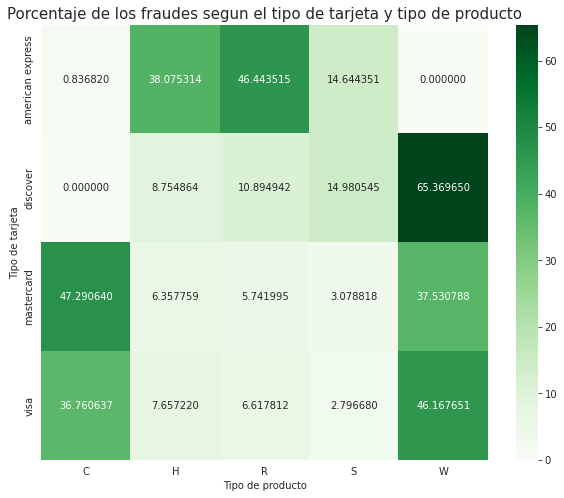

In [ ]:
sns.set({'figure.figsize':(10,8)})

g = sns.heatmap(porcentaje_fraudes_productos_tarjetas, cmap="Greens", annot=True, fmt='f')
g.set_ylabel("Tipo de tarjeta") 
g.set_xlabel("Tipo de producto")
g.set_title("Porcentaje de los fraudes segun el tipo de tarjeta y tipo de producto", size=15)

plt.show()

##Boxplot

In [ ]:
fraude = joineado.loc[joineado['isFraud']== 1, :]

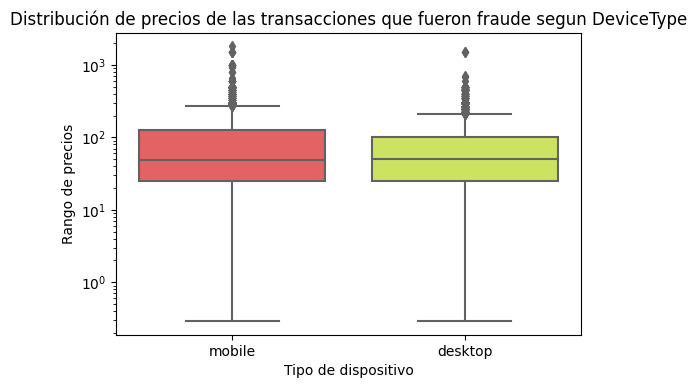

In [ ]:
plt.figure(dpi=100)
plt.title("Distribución de precios de las transacciones que fueron fraude segun DeviceType")
box = sns.boxplot(data=fraude, y='TransactionAmt', x='DeviceType', palette=['#F84D4F', "#DAF84D"])
box.set(yscale = 'log')
plt.ylabel('Rango de precios')
plt.xlabel('Tipo de dispositivo')
plt.show()

##Histograma

Encontre una relacion con el TransactionDT, de esta forma encodeando asi puedo saber en que momento del dia se realizan la mayor cantidad de fraudes

In [ ]:
fraude_horas = train_transaction.loc[train_transaction['isFraud']== 1, :].copy()

In [ ]:
fraude_horas['TransactionDT']= fraude_horas['TransactionDT'] % 86400

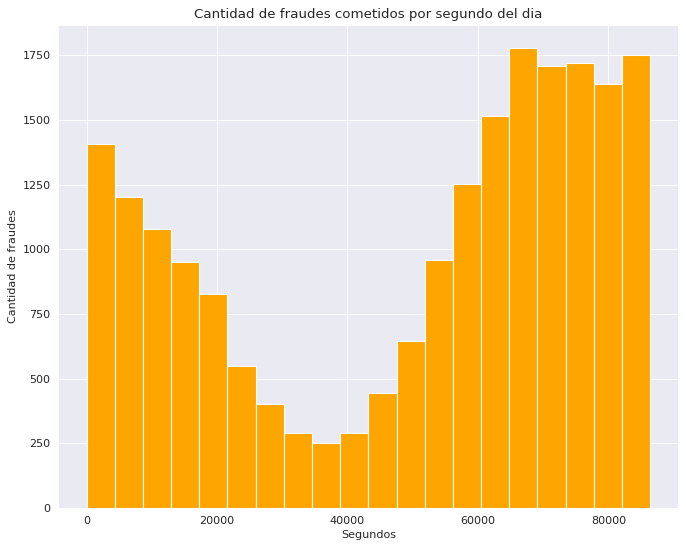

In [ ]:
plt.figure(dpi=80)
plt.hist(fraude_horas['TransactionDT'],bins=20, color = 'orange')

plt.title("Cantidad de fraudes cometidos por segundo del dia")
plt.xlabel("Segundos")
plt.ylabel("Cantidad de fraudes")

plt.show()

##Violinplot

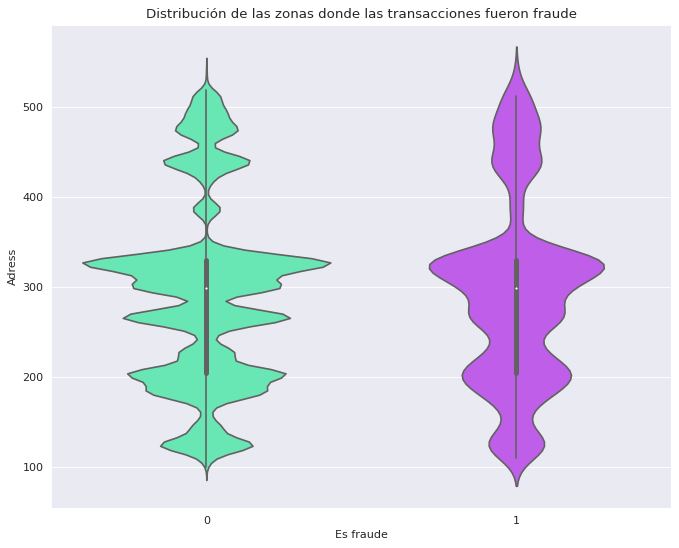

In [ ]:
plt.figure(dpi=80)
plt.title("Distribución de las zonas donde las transacciones fueron fraude")
sns.violinplot(data=joineado,y='addr1',x='isFraud',palette=['#53FCB9', "#C847FF"])
plt.ylabel('Adress')
plt.xlabel('Es fraude')
plt.show()

##Barplot

In [ ]:
fraudes_por_producto = train_transaction.groupby(['ProductCD']).agg({'isFraud':'sum'})
total_fraudes = fraudes_por_producto['isFraud'].sum()
porcentaje_productos_fraude = (fraudes_por_producto / total_fraudes)*100

In [ ]:
porcentaje_productos_fraude.reset_index(inplace = True)
porcentaje_productos_fraude.rename(columns={'ProductCD': 'tipo_producto', 'isFraud': 'porcentaje_fraudes'},inplace = True)
porcentaje_productos_fraude

,tipo_producto,porcentaje_fraudes
0,C,38.755263
1,H,7.617481
2,R,6.901224
3,S,3.319944
4,W,43.406088


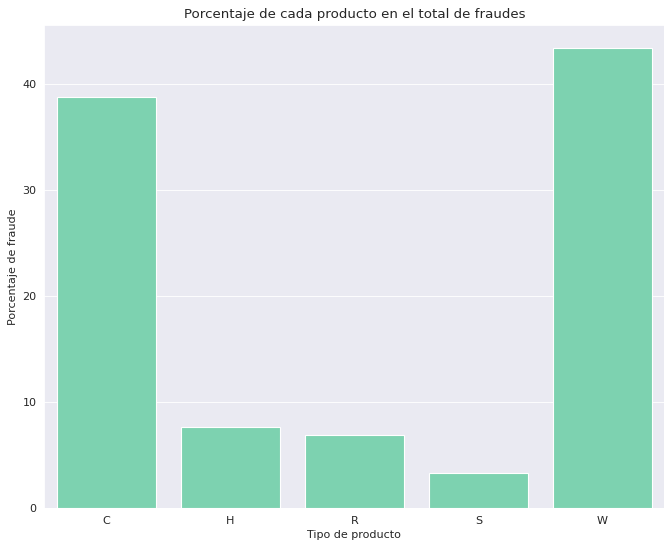

In [ ]:
plt.figure(dpi = 80)
barplot = sns.barplot(x=porcentaje_productos_fraude['tipo_producto'], y = porcentaje_productos_fraude['porcentaje_fraudes'], data = porcentaje_productos_fraude, color= '#53FCB9', saturation = 0.5)
barplot.set(xlabel='Tipo de producto', ylabel='Porcentaje de fraude', title = 'Porcentaje de cada producto en el total de fraudes')
plt.show()